The goal of this file is to read in one example of an eeg output for a 10s period and perform a fast fourier transform on it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, try to read in an example

In [2]:
# Function to print out the values
def fft_printout(time_series, duration):
    """Takes in a pandas Series and computes a Fourier Transform"""

    # THIS MAY BE A MISINTERPRETATION OF THE DATA
    t = np.linspace(0, duration, time_series.size)
    dft_result = np.fft.rfft(time_series)

    frequencies = np.fft.rfftfreq(len(time_series), t[1] - t[0])

    # Extract amplitude and phase
    amplitude = np.abs(dft_result)
    phase = np.angle(dft_result)

    # Original Graph
    plt.figure(figsize=(15, 6))
    plt.plot(t, time_series)
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plotting Amplitude Spectrum
    plt.figure(figsize=(15, 6))
    plt.scatter(frequencies, amplitude, marker = ".")
    plt.title('Amplitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 10)
    plt.ylim(0, 50000)
    plt.show()

    # Plotting Phase Spectrum
    plt.figure(figsize=(15, 6))
    plt.scatter(frequencies, phase, marker = ".")
    plt.title('Phase Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.xlim(0.1, 2)
    plt.ylim(-3.14, 3.14)
    plt.show()
    print("test")


(106800, 15)
['Fp1' 'F3' 'C3' 'P3' 'F7' 'T3' 'T5' 'O1' 'Fz' 'Cz' 'Pz' 'Fp2' 'F4' 'C4'
 'P4' 'F8' 'T4' 'T6' 'O2' 'EKG']
18000


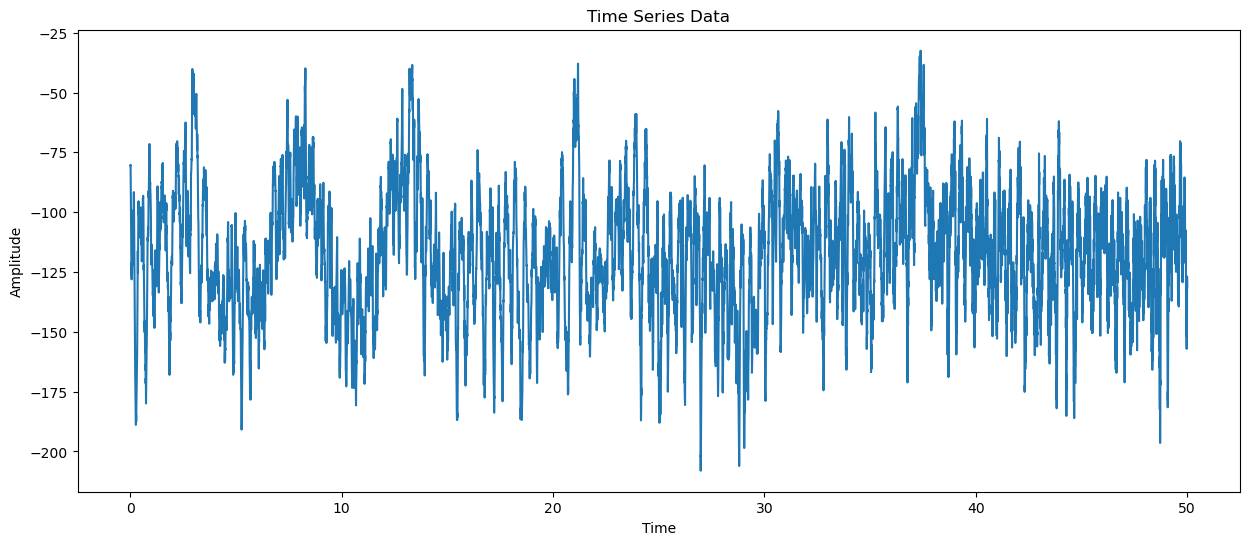

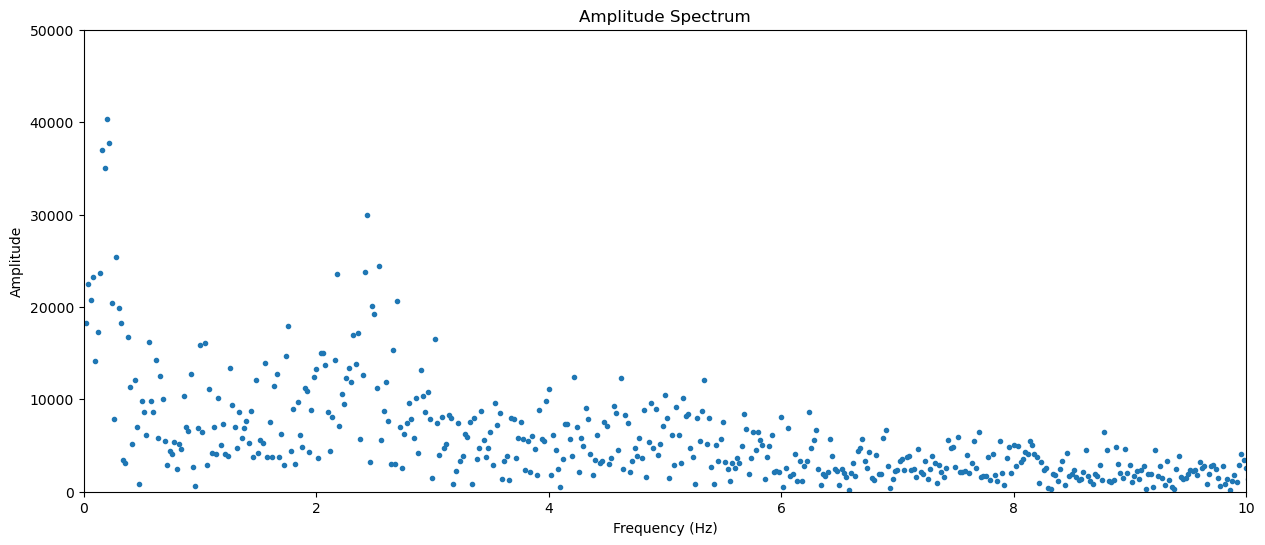

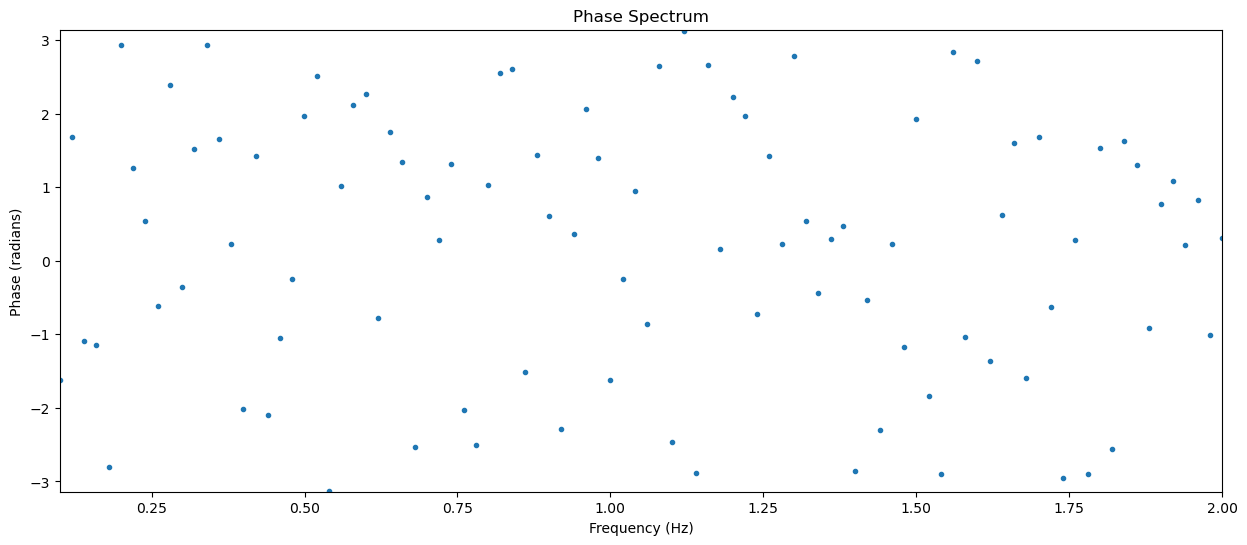

test


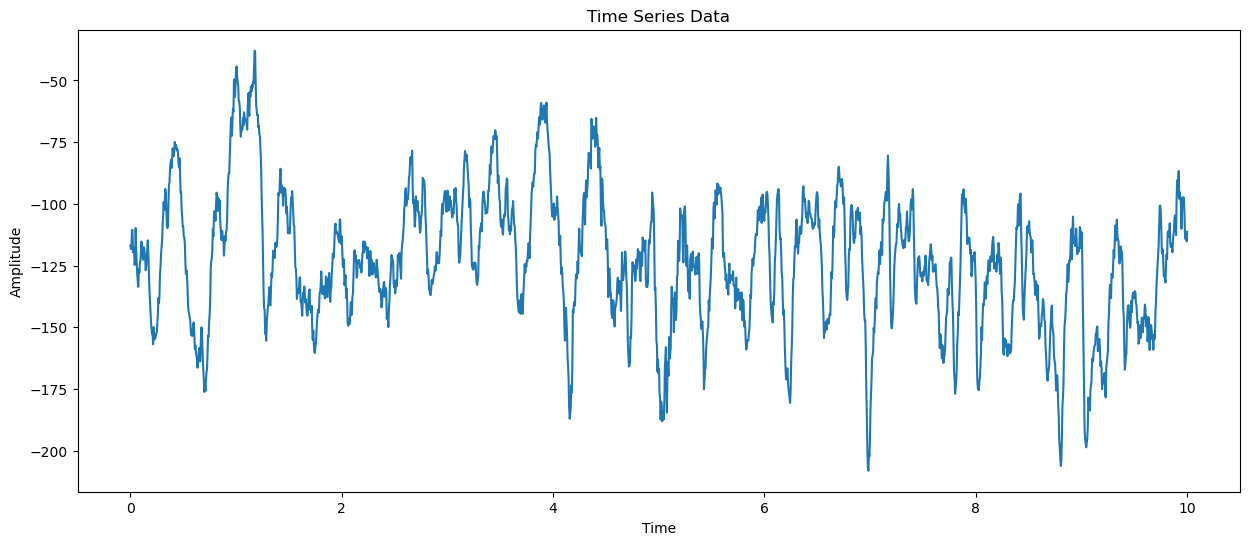

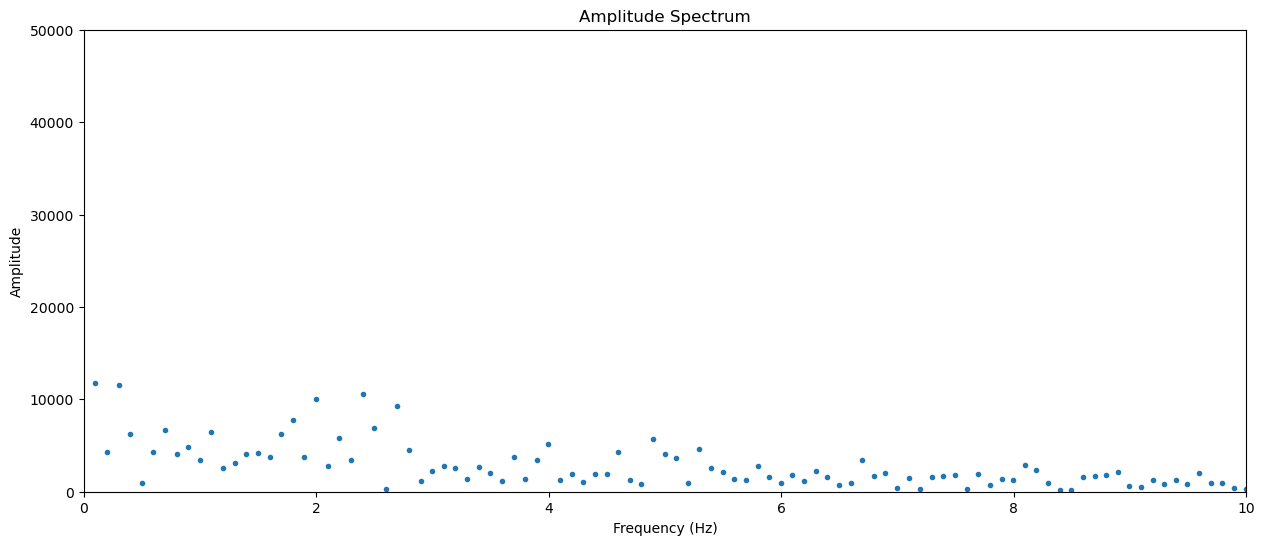

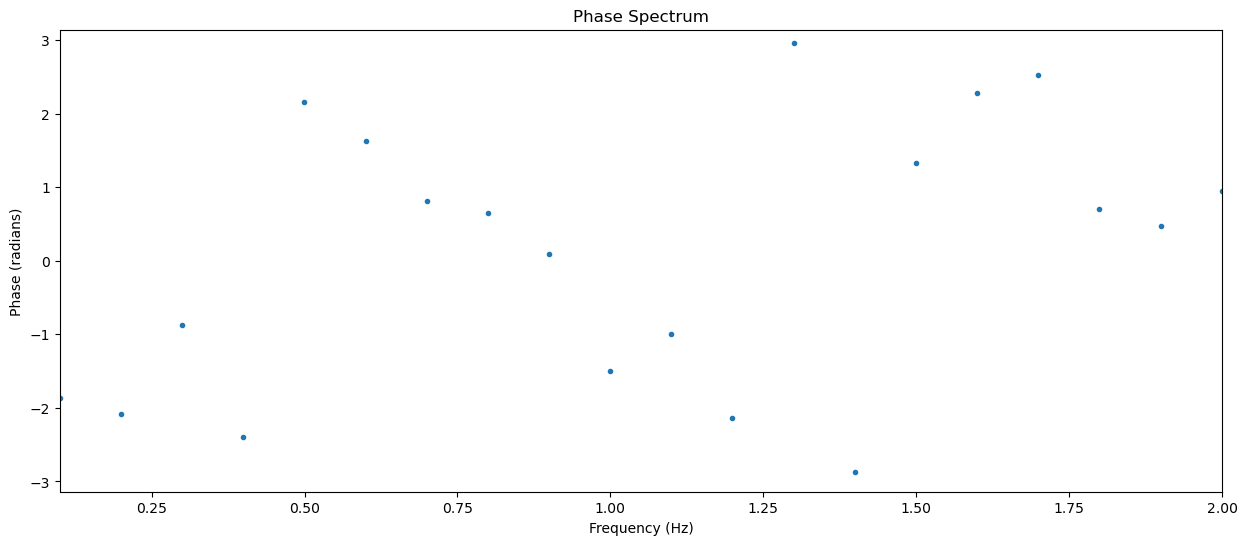

test


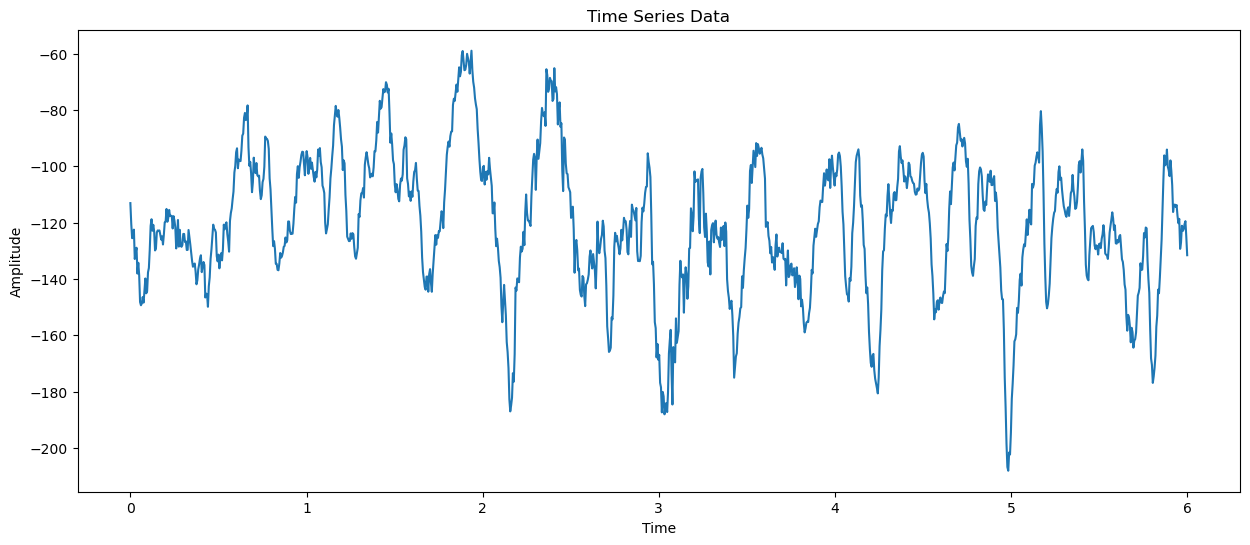

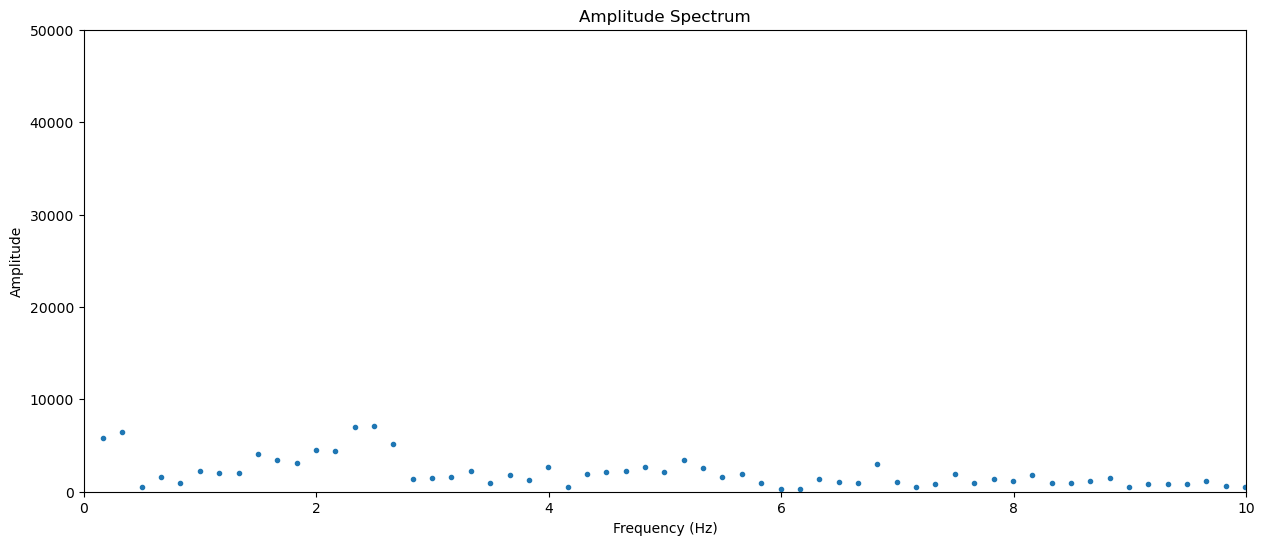

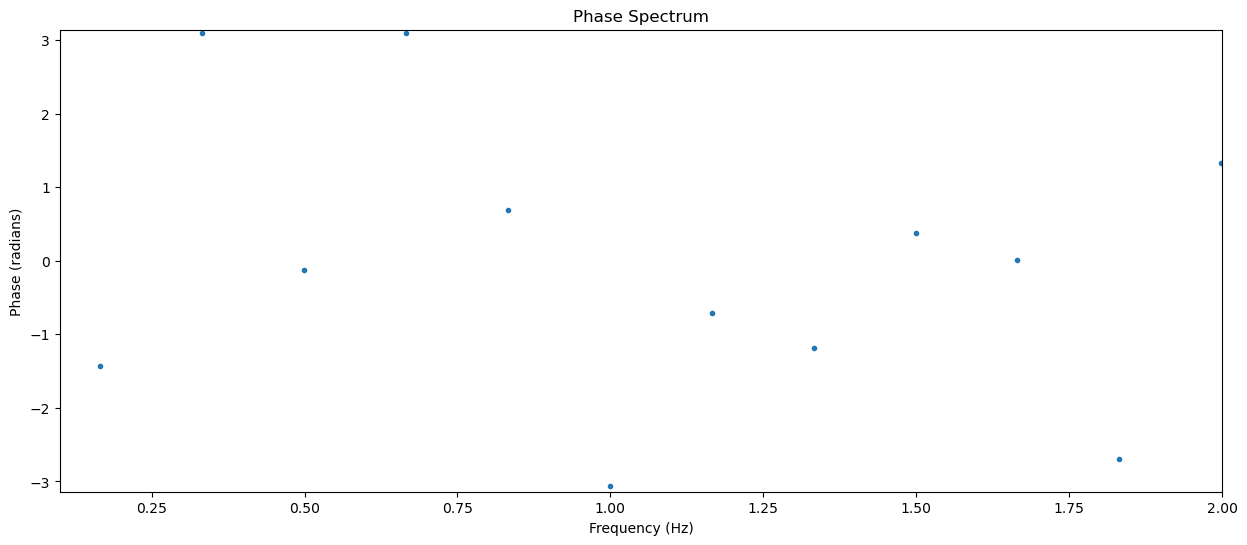

test


In [3]:
# GET ATTRIBUTION FOR THIS CODE: https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/468010

GET_ROW = 0
EEG_PATH = '../train_eegs/'
SPEC_PATH = '../train_spectrograms/'

train = pd.read_csv('../train.csv')
row = train.iloc[GET_ROW]

print(train.shape)

# Read in the eeg data as a parquet
eeg_full = pd.read_parquet(f'{EEG_PATH}{row.eeg_id}.parquet')

print(eeg_full.columns.values)

# Perform DFT using numpy's rfft function
dft_result = np.fft.rfft(eeg_full.iloc[:, 0])
print(eeg_full.iloc[:, 0].size)

# Get the eeg data for a few intervals
eeg_offset = int( row.eeg_label_offset_seconds )
eeg_50s = eeg_full.iloc[eeg_offset*200:(eeg_offset+50)*200]
eeg_10s = eeg_full.iloc[(eeg_offset+20)*200:(eeg_offset+30)*200]
eeg_6s = eeg_full.iloc[(eeg_offset+22)*200:(eeg_offset+28)*200]

# Print out the results for a few intervals
fft_printout(eeg_50s.iloc[:, 0], 50)
fft_printout(eeg_10s.iloc[:, 0], 10)
fft_printout(eeg_6s.iloc[:, 0], 6)

# Read in the spectrogram data (not used yet)
spectrogram = pd.read_parquet(f'{SPEC_PATH}{row.spectrogram_id}.parquet')
spec_offset = int( row.spectrogram_label_offset_seconds )
spectrogram = spectrogram.loc[(spectrogram.time>=spec_offset)
                     &(spectrogram.time<spec_offset+600)]
